In [ ]:
!pip install python-louvain networkx leidenalg matplotlib python-igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 88.0 MB/s eta 0:00:00
  Created wheel for python-igraph: filename=python_igraph-0.10.4-py3-none-any.whl size=9073 sha256=2bb569015f74451023d9554c20b05cc392dd52641058cc7ac03553500532c7f3
  Stored in directory: /root/.cache/pip/wheels/dc/07/ac/bff79052fd6222d1239b228cd24a47222f227c2350f9c4df01
Successfully built python-igraph


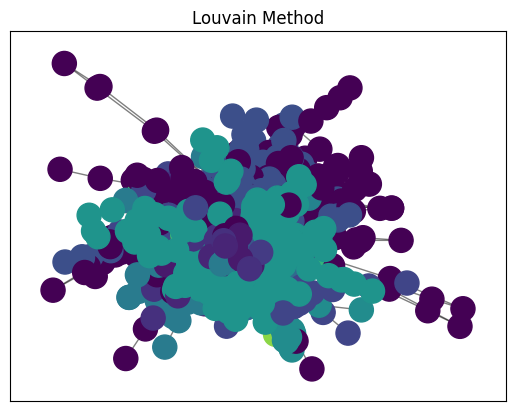

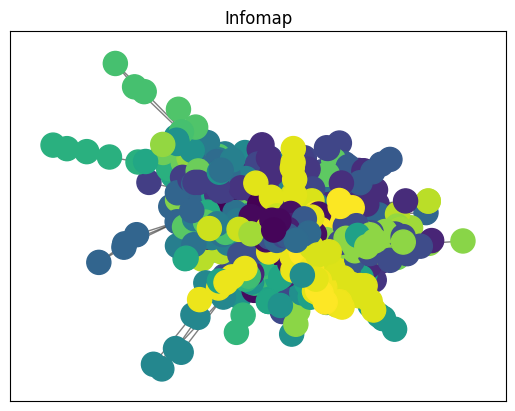

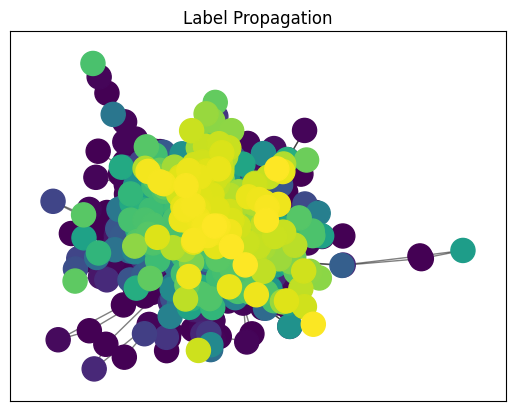

In [ ]:
import networkx as nx
import community as community_louvain
import igraph as ig
import leidenalg
import matplotlib.pyplot as plt
from sklearn.metrics import normalized_mutual_info_score, jaccard_score, adjusted_rand_score

def read_pajek(file_path):
    G = nx.read_pajek(file_path)
    return nx.Graph(G)

def apply_louvain(G):
    partition = community_louvain.best_partition(G)
    return partition

def apply_infomap(G):
    ig_graph = ig.Graph.from_networkx(G)
    infomap_partition = ig_graph.community_infomap()
    partition = {str(node): membership for node, membership in zip(G.nodes(), infomap_partition.membership)}
    return partition

def apply_label_propagation(G):
    partition = nx.algorithms.community.label_propagation.label_propagation_communities(G)
    partition = {node: i for i, comm in enumerate(partition) for node in comm}
    return partition

def plot_communities(G, partition, title):
    pos = nx.spring_layout(G)
    cmap = plt.get_cmap("viridis")
    plt.title(title)
    nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=cmap)
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    plt.show()

def jaccard_index(true_partition, pred_partition):
    labels_true = list(true_partition.values())
    labels_pred = list(pred_partition.values())
    return jaccard_score(labels_true, labels_pred, average="weighted")

def normalized_mutual_information(true_partition, pred_partition):
    labels_true = list(true_partition.values())
    labels_pred = list(pred_partition.values())
    return normalized_mutual_info_score(labels_true, labels_pred)

def adjusted_rand_index(true_partition, pred_partition):
    labels_true = list(true_partition.values())
    labels_pred = list(pred_partition.values())
    return adjusted_rand_score(labels_true, labels_pred)

def modularity(G, partition):
    return community_louvain.modularity(partition, G)

def main():
    # Upload your network file (.net) to Google Colab using the file browser on the left sidebar
    file_path = "/content/drive/MyDrive/Colab Notebooks/A3-networks/real/airports_UW.net"
    G = read_pajek(file_path)

    louvain_partition = apply_louvain(G)
    infomap_partition = apply_infomap(G)
    label_propagation_partition = apply_label_propagation(G)

    plot_communities(G, louvain_partition, "Louvain Method")
    plot_communities(G, infomap_partition, "Infomap")
    plot_communities(G, label_propagation_partition, "Label Propagation")

if __name__ == "__main__":
    main()
